## Overview
Create a population sample of 6000 records.

### Objective
1. Loading and inspecting dataset
2. Observations
3. Select particular BusinessYear 2014
4. Remove "Family Option" rows 9216 records from 3796388 left 3787172
5. Binning "Age" column
6. Random Sampling from Population

### 1. Loading and inspecting dataset
#### import library
1. pandas that it allows you to create, manipulate, and analyze datasets efficiently.
2. numpy that it provides support for arrays, matrices, and various mathematical functions.
3. seaborn that it provides high-level functions to create attractive and informative plots.
4. matplotlib is a foundational library for creating static, interactive, and animated visualizations.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df_ra = pd.read_csv('../Rate.csv', low_memory=False)

In [4]:
# display all columns, Non-Null Count and Dtype
df_ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 24 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   BusinessYear                               int64  
 1   StateCode                                  object 
 2   IssuerId                                   int64  
 3   SourceName                                 object 
 4   VersionNum                                 int64  
 5   ImportDate                                 object 
 6   IssuerId2                                  int64  
 7   FederalTIN                                 object 
 8   RateEffectiveDate                          object 
 9   RateExpirationDate                         object 
 10  PlanId                                     object 
 11  RatingAreaId                               object 
 12  Tobacco                                    object 
 13  Age                                     

### 2. Observations
1. **Total raws and colums :** The dataset contains 12,694,445 rows(entries) and 24 columns
2. **Data Types and possible issues**

### 3. Select particular BusinessYear 2014
1. Accesses the column BusinessYear from the DataFrame df_ra
2. Counts the occurrences of each unique value in the BusinessYear column
3. Resets the index of the Series so that the unique values and their counts become columns in the new DataFrame

In [5]:
# Counts BusinessYear
df_ra['BusinessYear'].value_counts().reset_index()

,BusinessYear,count
0,2015,4676092
1,2016,4221965
2,2014,3796388


In [6]:
# display all columns
pd.set_option('display.max_columns',None)

# display first 5 rows
df_ra.head()

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,21,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,22,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [7]:
# Keep BusinessYear 2014 in df_ra2014
df_ra2014 = df_ra[df_ra['BusinessYear'] == 2014]

In [8]:
# 3,796,388 records
df_ra2014['BusinessYear'].value_counts().reset_index()

,BusinessYear,count
0,2014,3796388


In [9]:
# Counts values and reset index
df_ra2014['Age'].value_counts().reset_index

<bound method Series.reset_index of Age
0-20             82727
54               82321
45               82321
46               82321
47               82321
48               82321
49               82321
50               82321
51               82321
52               82321
53               82321
55               82321
43               82321
56               82321
57               82321
58               82321
59               82321
60               82321
61               82321
62               82321
63               82321
64               82321
44               82321
42               82321
31               82321
30               82321
21               82321
22               82321
23               82321
24               82321
25               82321
26               82321
27               82321
28               82321
29               82321
65 and over      82321
41               82321
32               82321
33               82321
34               82321
35               82321
36               

### 4. Remove "Family Option" rows 9216 records from 3796388 left 3787172
1. Set option to display all columns
2. Remove "Family Option" Value in "Age" column, and keep in df_ra_clean
3. Replace 0-20 to 20 and 65 and over to 60 in Age column
4. Covert column to numerical types
5. Select only "Age" and "PlanId" column from df_ra_clean

In [10]:
# Remove Family Option	9216 records from 3796388 = 3787172 
# Step1 : Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Step2 : Remove rows where 'Age' column has the value 'Family Option'
df_ra_clean = df_ra2014[df_ra2014['Age'] != 'Family Option'].copy()
# Step3 : Replace Age 0-20 to 20 and 65 and over to 65
df_ra_clean['Age'] = df_ra_clean['Age'].str.replace('0-20', '20')
df_ra_clean['Age'] = df_ra_clean['Age'].str.replace('65 and over', '65')
# Step4 : convert columns to numerical types
df_ra_clean['Age'] = pd.to_numeric(df_ra_clean['Age'], errors='coerce')

# Step5 : Select only the 'Age' and 'PlanId' columns from the cleaned DataFrame
df_ra_clean = df_ra_clean[['Age', 'PlanId']]
df_ra_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3787172 entries, 0 to 3796387
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Age     int64 
 1   PlanId  object
dtypes: int64(1), object(1)
memory usage: 86.7+ MB


In [11]:
#Counts all value in "Age" columns
df_ra_clean['Age'].value_counts()

Age
20    82727
54    82321
45    82321
46    82321
47    82321
48    82321
49    82321
50    82321
51    82321
52    82321
53    82321
55    82321
21    82321
56    82321
57    82321
58    82321
59    82321
60    82321
61    82321
62    82321
63    82321
64    82321
44    82321
43    82321
42    82321
41    82321
22    82321
23    82321
24    82321
25    82321
26    82321
27    82321
28    82321
29    82321
30    82321
31    82321
32    82321
33    82321
34    82321
35    82321
36    82321
37    82321
38    82321
39    82321
40    82321
65    82321
Name: count, dtype: int64

### 5. Binning "Age" column
1. Common age ranges for health-related analysis include the following categories
2. By Fixed Interval Binning, a simple method to create age groups
3. Analyze different age groups and plan types together affect the dependent variable (x) 
    - 0-20: Typically, those who are minors and covered under parents' or guardians' health insurance plans.
    - 21-25: Young adults, often covered under parental insurance until 26.
    - 26-40: Typically, adults in early to mid-career stages, where private insurance plans or employer-sponsored plans become more common.
    - 41-60: Pre-retirement age group, often with an increased focus on preventative care and management of chronic conditions.
    - 61-64: Near-retirement age, typically covered under employer-sponsored plans or private health insurance, just before eligibility for Medicare.
    - 65+: Seniors eligible for Medicare
4. Create a new column for age bins

In [12]:
# Common age bins for health-related analysis include the following categories 
# by Fixed Interval Binning, a simple approach to create age bins 
# and to analyze how different age groups and plan types together affect the dependent variable

bins = [0,21, 26, 41, 61, 65, float('inf')]  # Define age ranges
labels = ['0-20', '21-25', '26-40', '41-60', '61-64', '65+']  # Corresponding labels

# Create a new column for age bins
df_ra_clean['AgeGroup'] = pd.cut(df_ra_clean['Age'], bins=bins, labels=labels, right=False)
df_ra_clean = df_ra_clean[['AgeGroup', 'Age', 'PlanId']].reset_index(drop=True).sort_values(by='AgeGroup')


In [13]:
df_ra_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3787172 entries, 0 to 3787171
Data columns (total 3 columns):
 #   Column    Dtype   
---  ------    -----   
 0   AgeGroup  category
 1   Age       int64   
 2   PlanId    object  
dtypes: category(1), int64(1), object(1)
memory usage: 90.3+ MB


In [14]:
df_ra_clean.head()

,AgeGroup,Age,PlanId
0,0-20,20,21989AK0010001
2319186,0-20,20,87226TX0030004
2319232,0-20,20,87226TX0030005
2319278,0-20,20,87226TX0030007
2319324,0-20,20,87226TX0030008


In [15]:
df_ra_clean['AgeGroup'].value_counts().reset_index()

,AgeGroup,count
0,41-60,1646420
1,26-40,1234815
2,21-25,411605
3,61-64,329284
4,0-20,82727
5,65+,82321


In [16]:
# Group by PlanId and Benefit Name, then count occurrences
grouped_counts = df_ra_clean.groupby(['AgeGroup', 'PlanId']).size().reset_index(name='Count')
grouped_counts

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1059/3032173075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df_ra_clean.groupby(['AgeGroup', 'PlanId']).size().reset_index(name='Count')


,AgeGroup,PlanId,Count
0,0-20,10191NJ0030001,1
1,0-20,10191NJ0030002,1
2,0-20,10191NJ0040001,1
3,0-20,10191NJ0040002,1
4,0-20,10191NJ0050001,1
...,...,...,...
36853,65+,99969OH0040012,17
36854,65+,99969OH0040013,17
36855,65+,99969OH0050007,68
36856,65+,99969OH0050013,68


In [17]:
filtered_counts = grouped_counts[grouped_counts['PlanId'] == '10191NJ0030001']
filtered_counts

,AgeGroup,PlanId,Count
0,0-20,10191NJ0030001,1
6143,21-25,10191NJ0030001,5
12286,26-40,10191NJ0030001,15
18429,41-60,10191NJ0030001,20
24572,61-64,10191NJ0030001,4
30715,65+,10191NJ0030001,1


In [18]:
# Count occurrences and reset the index
age_group_counts = df_ra_clean[['AgeGroup', 'PlanId']].value_counts().reset_index(name='Count')

# Sort by AgeGroup first, then PlanId
age_group_counts = age_group_counts.sort_values(by=['AgeGroup', 'PlanId'])
# age_group_counts.describe

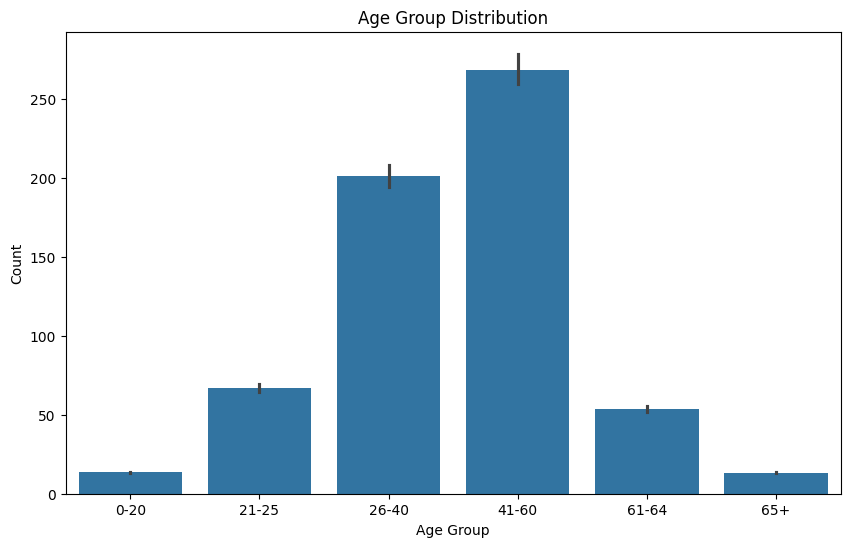

In [19]:
# Plotting the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Count', data=age_group_counts)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [52]:
#create csv after clean BenefitCostSharing no duplicates
##df_ra_clean.to_csv('binning_rate.csv')

### 6. Random Sampling from Population
### andomly selecting 1,000 observations from each of the 6 age groups within the population.

In [20]:
#Sampling 100 rows from each 6 AgeGroup
sampled_data = df_ra_clean.groupby('AgeGroup', group_keys=False, observed=True).apply(
    lambda group: group.sample(n=1000, random_state=43),
    include_groups=False
)

#Reset index for convenience
sampled_data.reset_index(drop=True, inplace=True)

In [21]:
# Create CSV file
sampled_data.to_csv('sample_rate.csv')